### Brief  Description
#### This dataset reflects the real predictive maintenance that is encountered in the industry with measuremets from real equipment.
The dataset consists of 10 000 data points stored as rows with 14 features in columns.
* UID: Unique indentifier ranging from 1 to 10000
* ProductID: Consisiting of letter L,M or H indicating Low, Mediam and High resp. with some letter
* Type: Consisiting of letter L,M or H indicating Low, Mediam and High resp.
* Air Temperature: It is provided in K with a std deviation of 2K around 300K
* Process Temperature: It is also provided in K with std deviation of 1K, added to air temp plus 10K
* Rotational Speed: It is in rpm calculated from horsepower of 2860W
* Torque: Nm 
* Tool Wear: It is given in min

#### Targets are:
- Target: Failure and no failure(binary classification)
- Failure Type: Type of failure( mulitclass classification)

In [48]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# Loading data and first impressions

In [49]:
df = pd.read_csv('predictive_maintenance.csv')

In [50]:
# Let us see the top 5 rows of the dataset
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [51]:
df.sample(10)

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
1832,1833,M16692,M,297.8,307.4,1330,51.7,183,0,No Failure
2862,2863,L50042,L,300.6,309.5,1867,23.0,242,0,No Failure
5703,5704,H35117,H,302.3,311.7,1456,45.4,130,0,No Failure
8065,8066,M22925,M,300.5,311.9,1670,26.3,89,0,No Failure
7336,7337,H36750,H,299.9,310.5,1549,42.8,208,0,No Failure
3221,3222,L50401,L,300.6,309.6,1423,49.1,74,0,No Failure
3545,3546,L50725,L,301.8,310.8,1576,38.6,38,0,No Failure
7556,7557,L54736,L,300.3,311.4,1471,37.0,114,0,No Failure
2891,2892,L50071,L,300.6,309.6,1682,30.7,78,0,No Failure
5695,5696,L52875,L,302.4,311.8,1451,42.0,110,0,No Failure


In [52]:
# Let us check the shape of our data
df.shape

(10000, 10)

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [54]:
df.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


In [55]:
# To check for null values
df.isnull().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64

We can see that there no null values in our data

In [56]:
# We can drop UDI and ProductID as they are not important
df.drop(columns=['UDI', 'Product ID'], axis = 1, inplace = True)

In [57]:
df.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,M,298.1,308.6,1551,42.8,0,0,No Failure
1,L,298.2,308.7,1408,46.3,3,0,No Failure
2,L,298.1,308.5,1498,49.4,5,0,No Failure
3,L,298.2,308.6,1433,39.5,7,0,No Failure
4,L,298.2,308.7,1408,40.0,9,0,No Failure


In [58]:
# Let us look at the types of the failure
df['Failure Type'].nunique()

6

In [59]:
df['Failure Type'].value_counts()

No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: Failure Type, dtype: int64

#### Quick Insight:  
We can see that the dataset is highly unbalanced

In [60]:
df.Target.value_counts()

0    9661
1     339
Name: Target, dtype: int64

In [61]:
df.Target.value_counts(normalize = True)

0    0.9661
1    0.0339
Name: Target, dtype: float64

In [62]:
df.Type.value_counts()

L    6000
M    2997
H    1003
Name: Type, dtype: int64

In [63]:
# To check if there is consistancy between 'Target' and 'Failure Type'
df_failure = df[df['Target'] == 1]
df_failure['Failure Type'].value_counts()

Heat Dissipation Failure    112
Power Failure                95
Overstrain Failure           78
Tool Wear Failure            45
No Failure                    9
Name: Failure Type, dtype: int64

 #### Warning!!
 There are 9 values that no wrongly charaterized i.e. Target is showing 1 (means failure) but the Failure Type is saying no failure

In [64]:
# Let us look into the dataset
df_failure[df_failure['Failure Type'] == 'No Failure']

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
1437,H,298.8,309.9,1439,45.2,40,1,No Failure
2749,M,299.7,309.2,1685,28.9,179,1,No Failure
4044,M,301.9,310.9,1419,47.7,20,1,No Failure
4684,M,303.6,311.8,1421,44.8,101,1,No Failure
5536,M,302.3,311.8,1363,54.0,119,1,No Failure
5941,L,300.6,310.7,1438,48.5,78,1,No Failure
6478,L,300.5,309.8,1663,29.1,145,1,No Failure
8506,L,298.4,309.6,1710,27.3,163,1,No Failure
9015,L,297.2,308.1,1431,49.7,210,1,No Failure


It would be better for us to delete these rows as we don't know what the gournd truth is!

In [65]:
index_possible_failure = df_failure[df_failure['Failure Type'] == 'No Failure'].index
df.drop(index_possible_failure, axis = 0, inplace = True)

Similarly checking it for the Target = 0, i.e. no failure

In [66]:
df_failure = df[df['Target'] == 0]
df_failure['Failure Type'].value_counts()

No Failure         9643
Random Failures      18
Name: Failure Type, dtype: int64

In [67]:
# Here also we have to drop these 18 rows as we don't know what the ground thruth is
index_failure = df_failure[df_failure['Failure Type'] == 'Random Failures'].index
df.drop(index_failure, axis = 0, inplace = True)

27 instances have been removed (0.27% of the entire dataset) of which:
* 9 belonged to class __Failure in 'Target'__ varible and __No Failure in target 'Failure Type;__
* 18 belonged to class __No failure in 'Target'__ variable and __Random failure in target 'Failure Type'__

In [68]:
df.shape

(9973, 8)

In [69]:
df.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,M,298.1,308.6,1551,42.8,0,0,No Failure
1,L,298.2,308.7,1408,46.3,3,0,No Failure
2,L,298.1,308.5,1498,49.4,5,0,No Failure
3,L,298.2,308.6,1433,39.5,7,0,No Failure
4,L,298.2,308.7,1408,40.0,9,0,No Failure


In [70]:
# Let us reset the index
df.reset_index(inplace = True, drop = True)

In [71]:
df.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,M,298.1,308.6,1551,42.8,0,0,No Failure
1,L,298.2,308.7,1408,46.3,3,0,No Failure
2,L,298.1,308.5,1498,49.4,5,0,No Failure
3,L,298.2,308.6,1433,39.5,7,0,No Failure
4,L,298.2,308.7,1408,40.0,9,0,No Failure


## EDA: Explanatory Data Analysis

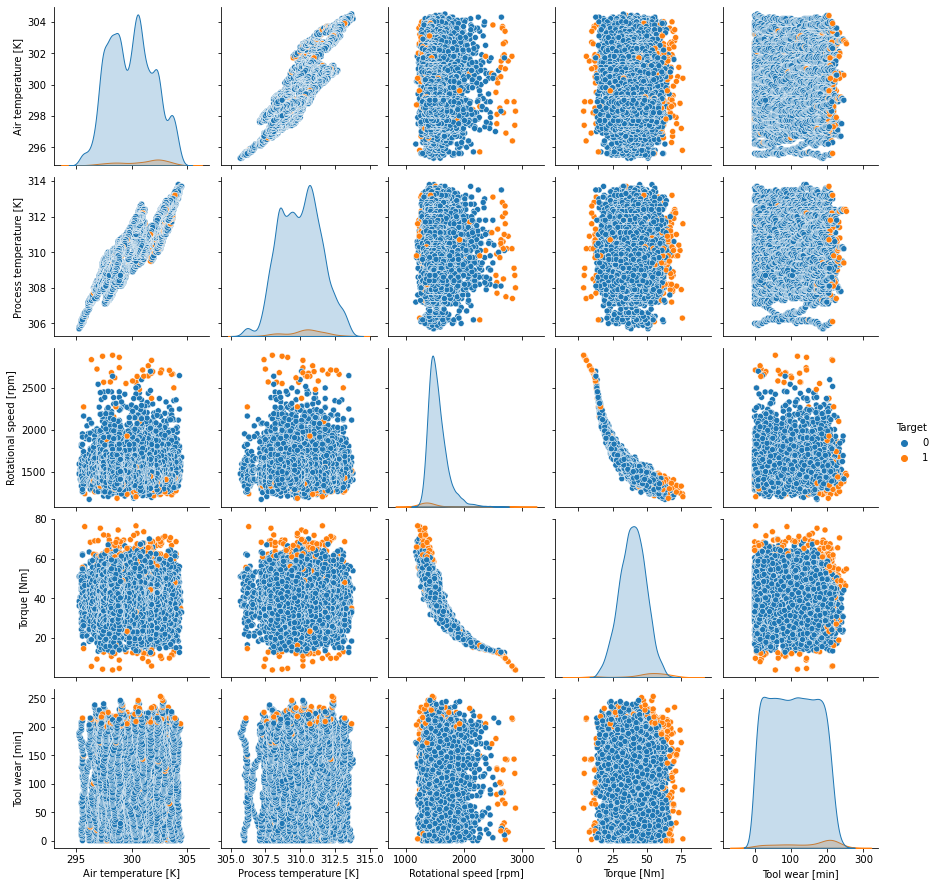

In [72]:
sns.pairplot(df, hue = 'Target')

#### Insights:
* Torque and rotational speed are highly corelated.
* Process temperature and Air temperature are also colreted which is true as the ambient temperature increaser the process temperature will increase as well
* The failure are occuring for the extreme values of some feature: The machinery fails for the lowest and the larget values of Torque and Rotational Speed... Means as the machine is operating in the normal operating range chance of tear are less.

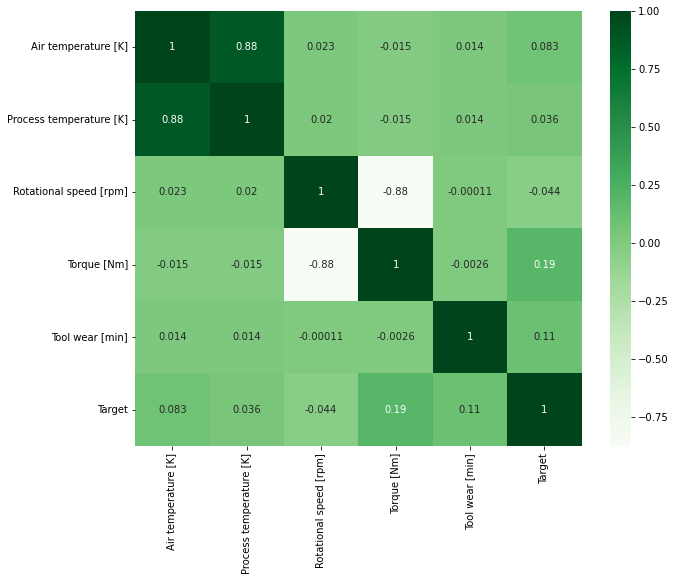

In [73]:
plt.figure(figsize = (10,8))
sns.heatmap(df.corr(), annot = True, cmap = 'Greens')
plt.show()

<AxesSubplot:xlabel='Torque [Nm]', ylabel='Rotational speed [rpm]'>

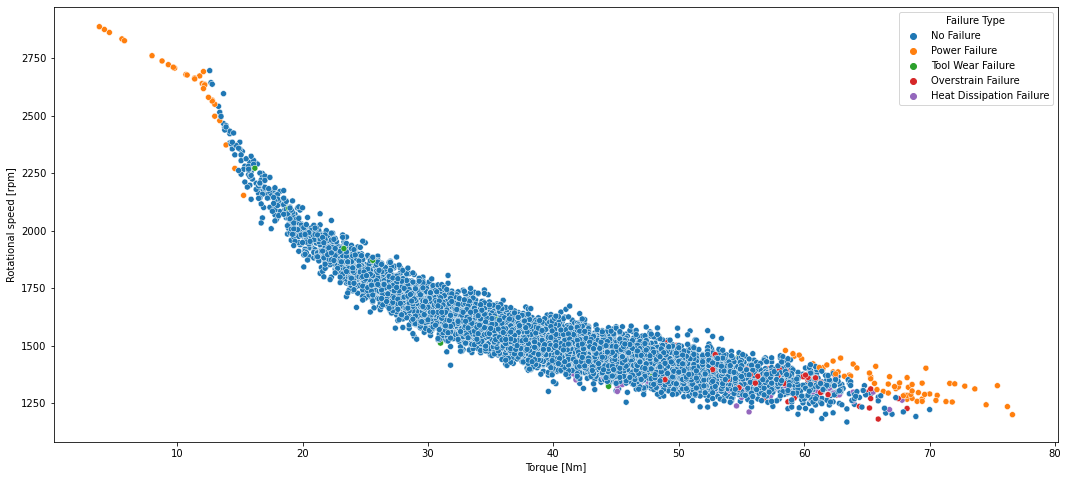

In [74]:
plt.figure(figsize = (18,8))
sns.scatterplot(data = df, x = 'Torque [Nm]', y = 'Rotational speed [rpm]', hue = 'Failure Type')

We can see from the fig that most of the failure are happening when rotational speed is high and torque is low also vice versa!

<AxesSubplot:xlabel='Torque [Nm]', ylabel='Rotational speed [rpm]'>

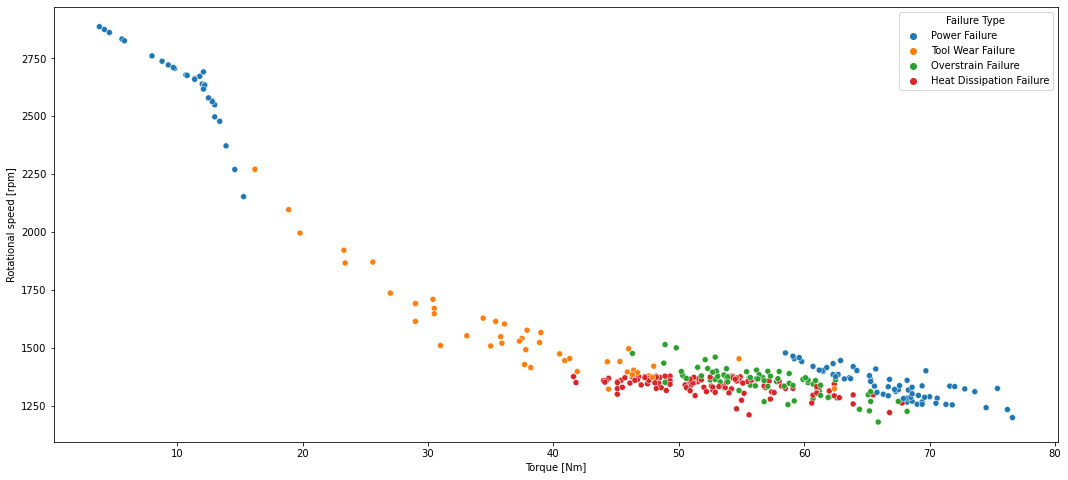

In [75]:
plt.figure(figsize = (18,8))
sns.scatterplot(data = df[df['Target']==1], x = 'Torque [Nm]', y = 'Rotational speed [rpm]', hue = 'Failure Type')

#### Some Insights:
* Power Failure happens both for the lower and the higher rotational speed/torque
* Between Torque 16Nm and 40 Nm all the failure are tool wear
* Overstrain failure takes for torque ranging from 41Nm to 68Nm
* Heat dissipation is happening at high torques and low speed

<AxesSubplot:xlabel='Torque [Nm]', ylabel='Rotational speed [rpm]'>

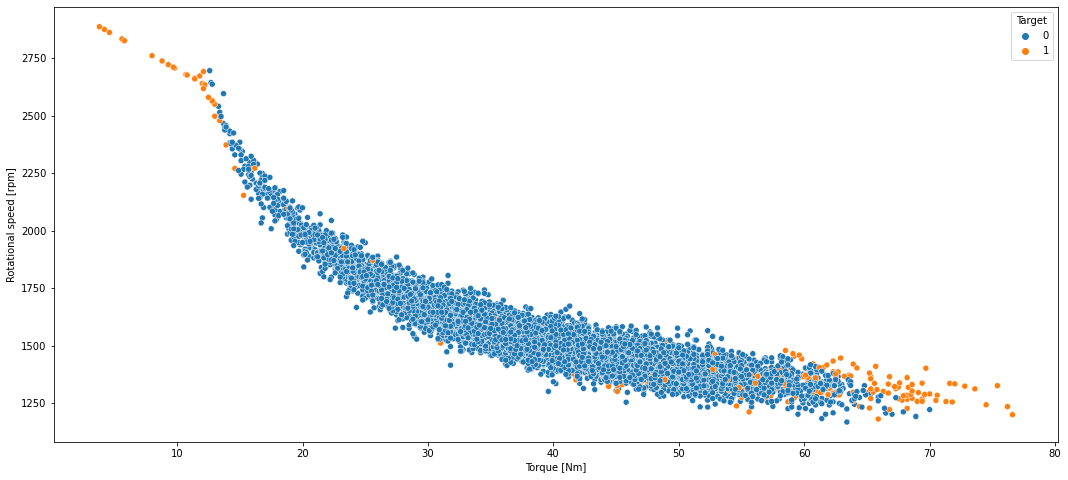

In [76]:
plt.figure(figsize = (18,8))
sns.scatterplot(data = df, x = 'Torque [Nm]', y = 'Rotational speed [rpm]', hue = 'Target')

<AxesSubplot:xlabel='Torque [Nm]', ylabel='Rotational speed [rpm]'>

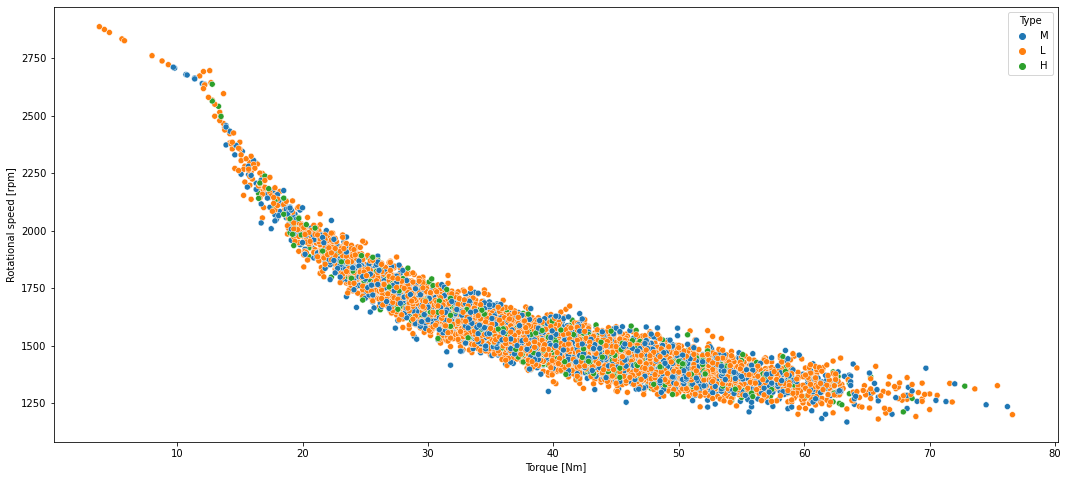

In [77]:
plt.figure(figsize = (18,8))
sns.scatterplot(data = df, x = 'Torque [Nm]', y = 'Rotational speed [rpm]', hue = 'Type')

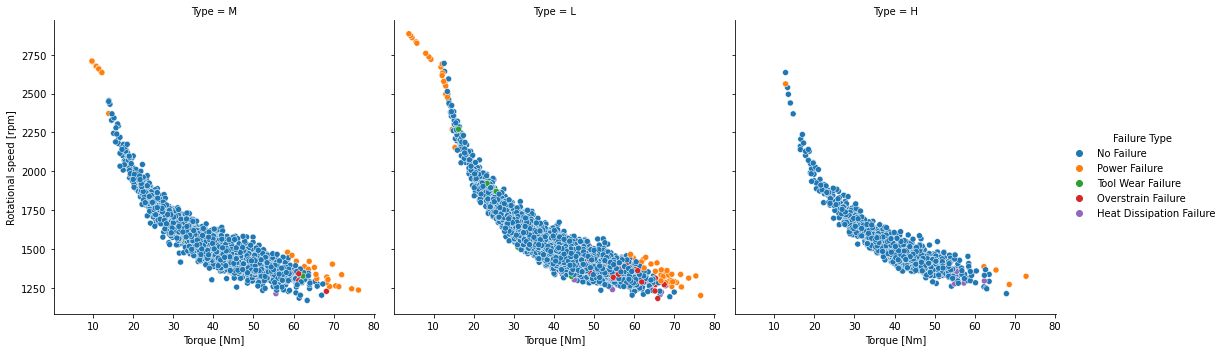

In [78]:
sns.relplot(data = df, x = 'Torque [Nm]', y = 'Rotational speed [rpm]', hue = 'Failure Type', col = 'Type')

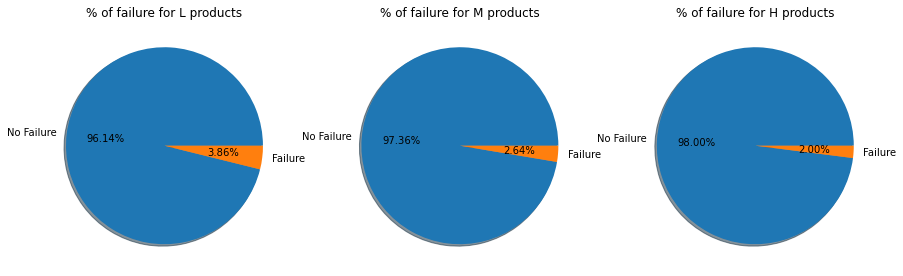

In [79]:
fig, ax = plt.subplots(1,3, figsize=(15,5))
ax.flatten()
k = 0
for i in ['L', 'M', 'H']:
    df_product_type = df[df["Type"] == i]
    ax[k].pie(df_product_type['Target'].value_counts(), labels = ['No Failure', 'Failure'],
             autopct = '%1.2f%%', shadow = True)
    ax[k].set_title('% of failure for ' +i+ ' products')
    k +=1

Form the fig we can see that L products have high failure rate as compared to M and H

### Distribution

-------SKEWNESS-------
Air temperature [K] skewness = 0.12
Process temperature [K] skewness = 0.02
Rotational speed [rpm] skewness = 1.99
Torque [Nm] skewness = -0.01
Tool wear [min] skewness = 0.03
------------------------


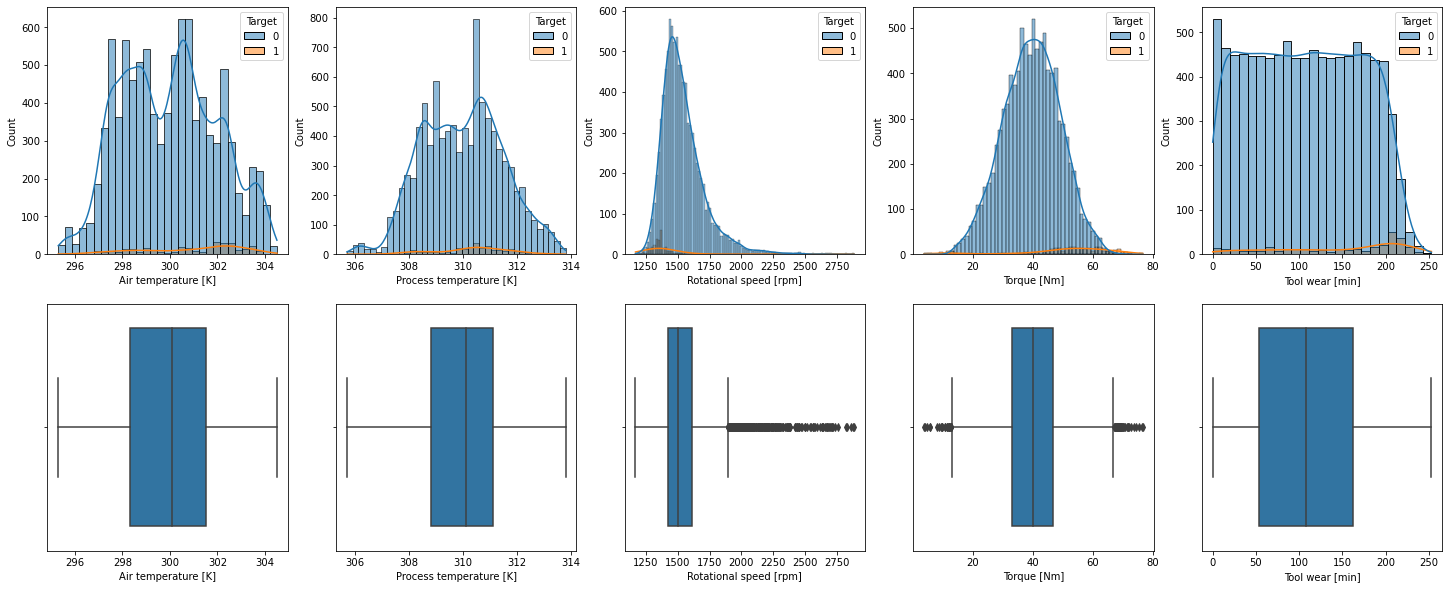

In [80]:
print('-------SKEWNESS-------')
fig, ax = plt.subplots(2,5, figsize= (25,10))
k = 0
for i in ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']:
    sns.histplot(data = df, x = i, kde = True, ax = ax[0,k], hue = 'Target')
    sns.boxplot(data = df, x = i, ax = ax[1,k])
    k +=1
    print('{} skewness = {}'.format(i, round(df[i].skew(),2)))
print('------------------------')

In [81]:
columns_failure_type = df['Failure Type'].unique().tolist()

In [82]:
from sklearn.preprocessing import OrdinalEncoder
ord_enc = OrdinalEncoder(categories=[['L', 'M', 'H'], columns_failure_type])

# Fit and transform the data for feature 'Type' and target 'Failure Type'
new_dat = ord_enc.fit_transform(df[['Type', 'Failure Type']])
new_dat
df.drop(['Type', 'Failure Type'], axis=1, inplace=True)

new_df = pd.DataFrame(new_dat, 
                      index=df.index, 
                      columns=['Type', 'Failure Type'])

df = pd.concat([df, new_df], axis=1)

In [83]:
df.head()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Type,Failure Type
0,298.1,308.6,1551,42.8,0,0,1.0,0.0
1,298.2,308.7,1408,46.3,3,0,0.0,0.0
2,298.1,308.5,1498,49.4,5,0,0.0,0.0
3,298.2,308.6,1433,39.5,7,0,0.0,0.0
4,298.2,308.7,1408,40.0,9,0,0.0,0.0


In [84]:
df.sample(20)

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Type,Failure Type
2453,299.0,308.6,1434,45.9,108,0,0.0,0.0
5602,303.0,312.3,1932,21.9,132,0,0.0,0.0
3780,302.3,310.8,1650,32.4,26,0,0.0,0.0
2133,299.3,309.0,1734,30.6,154,0,0.0,0.0
3237,301.0,309.6,1588,32.7,138,0,1.0,0.0
2071,299.4,309.3,1544,36.0,197,0,0.0,0.0
7840,300.5,311.9,1330,59.5,33,0,0.0,0.0
7855,300.7,312.4,1457,47.2,74,0,2.0,0.0
9428,298.5,309.2,1983,20.2,114,0,0.0,0.0
3577,301.8,310.5,1593,34.9,139,0,0.0,0.0


 # Scaling data

Since 'Rotational speed' and 'Torque' have some outliers, Will use RobustScaler:

In [85]:
df_scaled = df.copy()

from sklearn.preprocessing import RobustScaler
# Scaling Rotational speed and torque with robust scaler:
columns = ['Rotational speed [rpm]', 'Torque [Nm]']
scaler = RobustScaler()
features_scaled = scaler.fit_transform(df[columns])
features_scaled = pd.DataFrame(features_scaled, columns=columns)
df_scaled.drop(columns, axis=1, inplace=True)
df_scaled = pd.concat([df_scaled,features_scaled], axis=1)

df_scaled.head(5)

,Air temperature [K],Process temperature [K],Tool wear [min],Target,Type,Failure Type,Rotational speed [rpm],Torque [Nm]
0,298.1,308.6,0,0,1.0,0.0,0.253968,0.200000
1,298.2,308.7,3,0,0.0,0.0,-0.502646,0.459259
2,298.1,308.5,5,0,0.0,0.0,-0.026455,0.688889
3,298.2,308.6,7,0,0.0,0.0,-0.370370,-0.044444
4,298.2,308.7,9,0,0.0,0.0,-0.502646,-0.007407


The rest will be scaled with MinMax Scaling

In [86]:
from sklearn.preprocessing import MinMaxScaler

columns = ['Air temperature [K]', 'Process temperature [K]', 'Tool wear [min]']
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(df[columns])
features_scaled = pd.DataFrame(features_scaled, columns=columns)
df_scaled.drop(columns, axis=1, inplace=True)
df_scaled = pd.concat([df_scaled, features_scaled], axis=1)

df_scaled.head()

,Target,Type,Failure Type,Rotational speed [rpm],Torque [Nm],Air temperature [K],Process temperature [K],Tool wear [min]
0,0,1.0,0.0,0.253968,0.200000,0.304348,0.358025,0.000000
1,0,0.0,0.0,-0.502646,0.459259,0.315217,0.370370,0.011858
2,0,0.0,0.0,-0.026455,0.688889,0.304348,0.345679,0.019763
3,0,0.0,0.0,-0.370370,-0.044444,0.315217,0.358025,0.027668
4,0,0.0,0.0,-0.502646,-0.007407,0.315217,0.370370,0.035573


In [87]:
# Splitting X and y for all experiments
X = df_scaled.drop(['Target', 'Failure Type'], axis=1)
y = df_scaled['Failure Type']

In [91]:
from imblearn.combine import SMOTETomek

#Resampling the minority class. The strategy can be changed as required.
smt = SMOTETomek(random_state = 42, sampling_strategy = 'auto', n_jobs = -1)

#Fit the model to generate the data
X_res, y_res = smt.fit_resample(X, y)

In [92]:
X_res.shape, y_res.shape

((48213, 6), (48213,))

In [93]:
from collections import Counter

print(f"Original Dataset Shape {Counter(y)}")
print(f"Resampled Dataset Shape {Counter(y_res)}")


Original Dataset Shape Counter({0.0: 9643, 4.0: 112, 1.0: 95, 3.0: 78, 2.0: 45})
Resampled Dataset Shape Counter({2.0: 9643, 3.0: 9643, 4.0: 9643, 0.0: 9642, 1.0: 9642})


# Train Test Split

In [94]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2,random_state=42)

In [96]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

# Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_lr = logreg.predict(X_test)

log_train = round(logreg.score(X_train, y_train) * 100, 2)
log_accuracy = round(accuracy_score(y_pred_lr, y_test) * 100, 2)


print("Training Accuracy    :",log_train ,"%")
print("Model Accuracy Score :",log_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_lr))
print("\033[1m--------------------------------------------------------\033[0m")



Training Accuracy    : 95.47 %
Model Accuracy Score : 95.4 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

         0.0       0.99      0.85      0.91      1960
         1.0       0.99      0.99      0.99      1890
         2.0       0.90      0.99      0.94      1914
         3.0       0.95      0.98      0.96      1936
         4.0       0.96      0.97      0.97      1943

    accuracy                           0.95      9643
   macro avg       0.96      0.95      0.95      9643
weighted avg       0.96      0.95      0.95      9643

--------------------------------------------------------


In [97]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
decision = DecisionTreeClassifier()
decision.fit(X_train, y_train)
y_pred_dec = decision.predict(X_test)

decision_train = round(decision.score(X_train, y_train) * 100, 2)
decision_accuracy = round(accuracy_score(y_pred_dec, y_test) * 100, 2)

print("Training Accuracy    :",decision_train ,"%")
print("Model Accuracy Score :",decision_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_dec))
print("\033[1m--------------------------------------------------------\033[0m")


Training Accuracy    : 100.0 %
Model Accuracy Score : 99.08 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

         0.0       0.99      0.97      0.98      1960
         1.0       0.99      1.00      1.00      1890
         2.0       0.98      0.99      0.99      1914
         3.0       1.00      1.00      1.00      1936
         4.0       1.00      1.00      1.00      1943

    accuracy                           0.99      9643
   macro avg       0.99      0.99      0.99      9643
weighted avg       0.99      0.99      0.99      9643

--------------------------------------------------------


In [98]:
# Support Vector Machines
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)

svc_train = round(svc.score(X_train, y_train) * 100, 2)
svc_accuracy = round(accuracy_score(y_pred_svc, y_test) * 100, 2)

print("Training Accuracy    :",svc_train ,"%")
print("Model Accuracy Score :",svc_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_svc))
print("\033[1m--------------------------------------------------------\033[0m")


Training Accuracy    : 96.88 %
Model Accuracy Score : 96.58 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

         0.0       1.00      0.86      0.92      1960
         1.0       0.99      1.00      1.00      1890
         2.0       0.91      0.99      0.95      1914
         3.0       0.97      0.99      0.98      1936
         4.0       0.96      0.99      0.98      1943

    accuracy                           0.97      9643
   macro avg       0.97      0.97      0.97      9643
weighted avg       0.97      0.97      0.97      9643

--------------------------------------------------------


In [99]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)
random_forest.score(X_train, y_train)

random_forest_train = round(random_forest.score(X_train, y_train) * 100, 2)
random_forest_accuracy = round(accuracy_score(y_pred_rf, y_test) * 100, 2)

print("Training Accuracy    :",random_forest_train ,"%")
print("Model Accuracy Score :",random_forest_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_rf))
print("\033[1m--------------------------------------------------------\033[0m")


Training Accuracy    : 100.0 %
Model Accuracy Score : 99.33 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

         0.0       1.00      0.97      0.98      1960
         1.0       1.00      1.00      1.00      1890
         2.0       0.98      1.00      0.99      1914
         3.0       1.00      1.00      1.00      1936
         4.0       1.00      1.00      1.00      1943

    accuracy                           0.99      9643
   macro avg       0.99      0.99      0.99      9643
weighted avg       0.99      0.99      0.99      9643

--------------------------------------------------------


In [101]:
models = pd.DataFrame({
    'Model': [
        'Support Vector Machines', 'Logistic Regression', 'Random Forest',
        'Decision Tree'
    ],
    
    'Training Accuracy':
    [log_train, svc_train, decision_train, random_forest_train],
    
    'Model Accuracy Score': [
        log_accuracy, svc_accuracy, decision_accuracy, random_forest_accuracy
    ]
})


In [104]:
pd.set_option('precision',2)
models.sort_values(by='Model Accuracy Score', ascending=False).style.background_gradient(
        cmap='coolwarm').hide_index().set_properties(**{
            'font-family': 'Lucida Calligraphy',
            'color': 'LigntGreen',
            'font-size': '15px'
        })

Model,Training Accuracy,Model Accuracy Score
Decision Tree,100.00,99.33
Random Forest,100.00,99.08
Logistic Regression,96.88,96.58
Support Vector Machines,95.47,95.40


In [102]:
prediction1 = random_forest.predict(X_test)
print(prediction1)

[4. 3. 2. ... 2. 1. 0.]


In [103]:
cross_checking = pd.DataFrame({'Actual' : y_test , 'Predicted' : prediction1})
cross_checking.sample(5).style.background_gradient(
        cmap='coolwarm').set_properties(**{
            'font-family': 'Lucida Calligraphy',
            'color': 'LigntGreen',
            'font-size': '15px'
        })

,Actual,Predicted
14935,1.000000,1.000000
31141,3.000000,3.000000
43246,4.000000,4.000000
39953,4.000000,4.000000
19182,1.000000,1.000000
